In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df =pd.read_csv(r'C:\Users\SRK\Desktop\siva_python\classification\day4\telco_chrun_encoded.csv')


In [3]:
df.head()

,gender,senior,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,...,total_charges,churn,avg_monthly_charges,internet_service-fiber_optic,internet_service-no,contract-one_year,contract-two_year,payment_method-credit_card_auto,payment_method-electronic_check,payment_method-mailed_check
0,1,0,1,0,1,0,0,0,1,0,...,29.85,0,29.850000,0,0,0,0,0,1,0
1,0,0,0,0,34,1,0,1,0,1,...,1889.50,0,55.573529,0,0,1,0,0,0,1
2,0,0,0,0,2,1,0,1,1,0,...,108.15,1,54.075000,0,0,0,0,0,0,1
3,0,0,0,0,45,0,0,1,0,1,...,1840.75,0,40.905556,0,0,1,0,0,0,0
4,1,0,0,0,2,1,0,0,0,0,...,151.65,1,75.825000,1,0,0,0,0,1,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 25 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   gender                           7032 non-null   int64  
 1   senior                           7032 non-null   int64  
 2   partner                          7032 non-null   int64  
 3   dependents                       7032 non-null   int64  
 4   tenure                           7032 non-null   int64  
 5   phone_service                    7032 non-null   int64  
 6   multiple_lines                   7032 non-null   int64  
 7   online_security                  7032 non-null   int64  
 8   online_backup                    7032 non-null   int64  
 9   device_protection                7032 non-null   int64  
 10  tech_support                     7032 non-null   int64  
 11  streaming_tv                     7032 non-null   int64  
 12  streaming_movies    

In [6]:
df.churn.value_counts(normalize =True)

0    0.734215
1    0.265785
Name: churn, dtype: float64

In [8]:
y = df.churn
X = df.drop(columns ='churn')

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

## Adaboost classifier

In [20]:
from sklearn.ensemble import AdaBoostClassifier
ada =AdaBoostClassifier(random_state=1)

In [21]:
ada.fit(X_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=1)

In [22]:
def evaluation_train_test(model,X_train,y_train,X_test,y_test):
    y_train_prob = model.predict_proba(X_train)[:,1]
    y_train_pred = model.predict(X_train)
    y_test_prob = model.predict_proba(X_test)[:,1]
    y_test_pred = model.predict(X_test)
    from sklearn.metrics import confusion_matrix,accuracy_score,roc_auc_score,roc_curve,classification_report
    print('Train accuracy score of',model,':',accuracy_score(y_train,y_train_pred))
    print('Test accuracy score of ',model,':',accuracy_score(y_test,y_test_pred))
    
    print('rou_auc_score',roc_auc_score(y_train,y_train_prob))
    print('rou_auc_score',roc_auc_score(y_test,y_test_prob))
    print('Train classification report \n',classification_report(y_train,y_train_pred))
    print('Test classification report \n',classification_report(y_test,y_test_pred))

    
    fig,axes =plt.subplots(1,2,figsize =(15,5))
    sns.heatmap(confusion_matrix(y_train,y_train_pred),annot =True,fmt ='g',ax =axes[0])
    #plt.show()
    sns.heatmap(confusion_matrix(y_test,y_test_pred),annot =True,fmt ='g',ax =axes[1])
    plt.show()
    
    def roc_curves(y_true,y_true_prob):
          
          fpr, tpr, thresholds  =roc_curve(y_true,y_true_prob)
          thresholds[0] = thresholds[0]-1
          plt.plot(fpr,tpr)
          plt.plot(fpr,fpr)
          plt.plot(fpr,thresholds)
          plt.show();
    print('roc curve for Train')
    roc_curves(y_train,y_train_prob)
    print('roc curve for Test')
    roc_curves(y_test,y_test_prob)


Train accuracy score of AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=1) : 0.8108492482730597
Test accuracy score of  AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=1) : 0.8004739336492891
rou_auc_score 0.8608371131967858
rou_auc_score 0.8425764027693288
Train classification report 
               precision    recall  f1-score   support

           0       0.85      0.90      0.88      3608
           1       0.68      0.56      0.61      1314

    accuracy                           0.81      4922
   macro avg       0.76      0.73      0.74      4922
weighted avg       0.80      0.81      0.80      4922

Test classification report 
               precision    recall  f1-score   support

           0       0.84      0.89      0.87      1555
           1       0.64      0.54      0.59       555

    accuracy                  

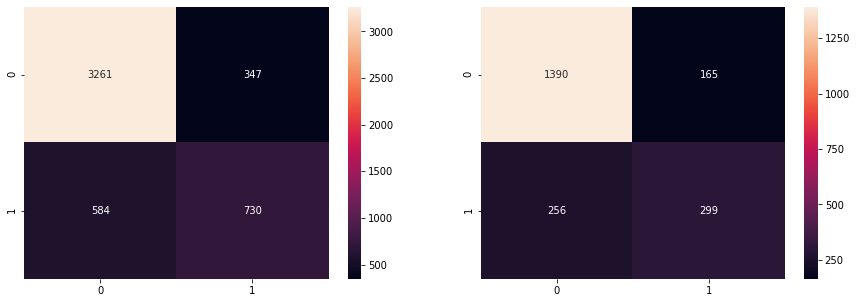

roc curve for Train


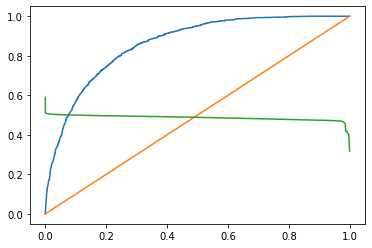

roc curve for Test


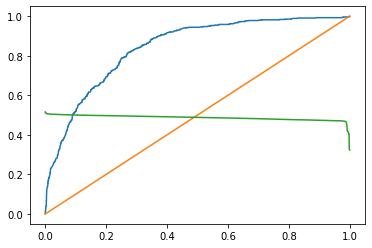

In [23]:
evaluation_train_test(ada,X_train,y_train,X_test,y_test)

In [ ]:
## Light GBM

In [25]:
import lightgbm as lgb

In [29]:
lgbc = lgb.LGBMClassifier()

In [30]:
lgbc.fit(X_train,y_train)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

Train accuracy score of LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0) : 0.8951645672490858
Test accuracy score of  LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0) : 0.788151658

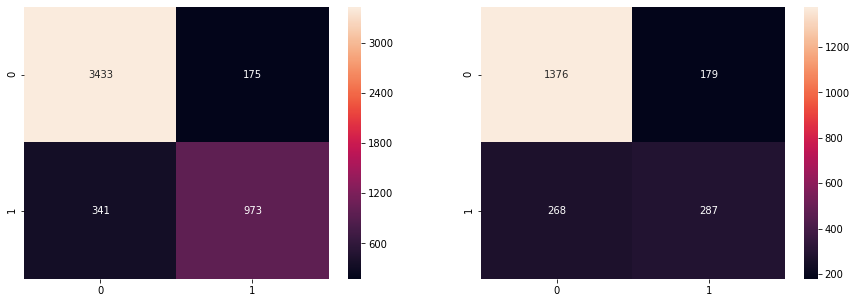

roc curve for Train


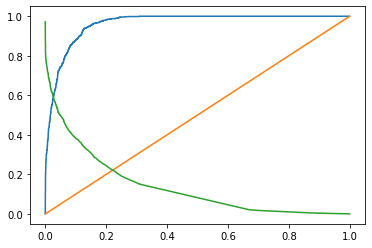

roc curve for Test


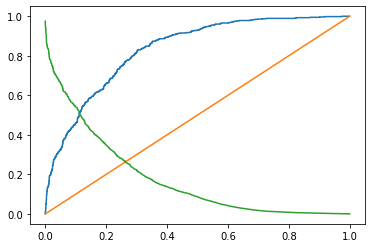

In [31]:
evaluation_train_test(lgbc,X_train,y_train,X_test,y_test)

In [34]:
from sklearn.model_selection import RandomizedSearchCV

from scipy.stats import randint
from scipy.stats import uniform
param ={
    'num_leaves':randint(10,50),
    'max_depth':randint(2,15),
    'learning_rate':uniform(0,1),
    'n_estimators':randint(50,200),
    'min_child_samples':randint(2,50)
}
rsearch_lg = RandomizedSearchCV(lgbc,param,cv =3,scoring ='roc_auc',n_jobs=-1,n_iter=200,random_state=1)
rsearch_lg.fit(X,y)
rsearch_lg.best_params_

{'learning_rate': 0.03905478323288236,
 'max_depth': 12,
 'min_child_samples': 10,
 'n_estimators': 80,
 'num_leaves': 17}

In [35]:
lgbcr = lgb.LGBMClassifier(**rsearch_lg.best_params_)

In [36]:
lgbcr.fit(X_train,y_train)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.03905478323288236,
               max_depth=12, min_child_samples=10, min_child_weight=0.001,
               min_split_gain=0.0, n_estimators=80, n_jobs=-1, num_leaves=17,
               objective=None, random_state=None, reg_alpha=0.0, reg_lambda=0.0,
               silent=True, subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0)

Train accuracy score of LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.03905478323288236,
               max_depth=12, min_child_samples=10, min_child_weight=0.001,
               min_split_gain=0.0, n_estimators=80, n_jobs=-1, num_leaves=17,
               objective=None, random_state=None, reg_alpha=0.0, reg_lambda=0.0,
               silent=True, subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0) : 0.8317757009345794
Test accuracy score of  LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.03905478323288236,
               max_depth=12, min_child_samples=10, min_child_weight=0.001,
               min_split_gain=0.0, n_estimators=80, n_jobs=-1, num_leaves=17,
               objective=None, random_state=None, reg_alpha=0.0, reg_lambda=0.0,
               silent=True, subsample=1.0, subsample_fo

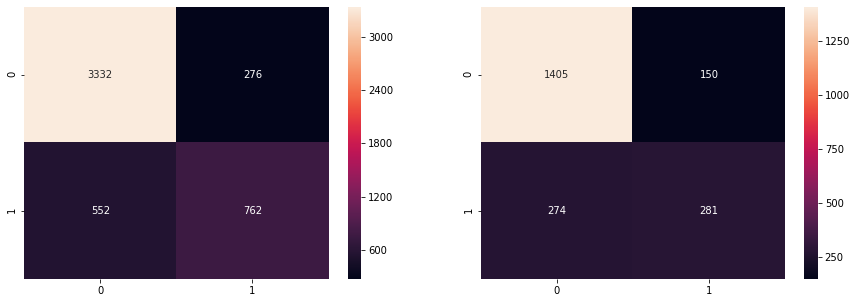

roc curve for Train


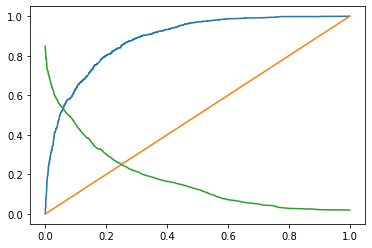

roc curve for Test


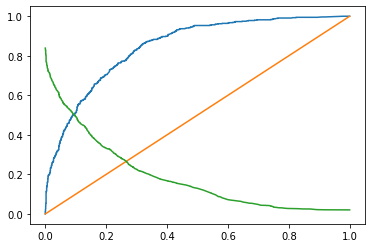

In [37]:
evaluation_train_test(lgbcr,X_train,y_train,X_test,y_test)